In [1]:
%reload_ext autoreload
%autoreload 2
%pylab inline
#import betafit
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
import scipy.misc
from cycler import cycler

Populating the interactive namespace from numpy and matplotlib


In [2]:
def prob_recognition(golds=100,pages=1,workers=20,times_seen=4):
    p = (10+pages)/golds
    return sum([scipy.misc.comb(workers,4+i)*p**(times_seen +i)*(1-p)**(workers-i-times_seen) for i in range(workers-times_seen+1)])

In [3]:
a = [prob_recognition(golds=100, pages=1,workers=i,times_seen=4) for i in range(1,300)]

In [4]:
total = 2000
agree = 3
gold_ratio = 0.05

times_seen = agree + 1
golds = gold_ratio * total
max_pages = int((golds - 10)/10)
max_workers = int(total *agree /(max_pages*10))
worse_case_worker_needed = int(total *agree /(1*10))
max_workers_if3 = int(total *agree /(3*10))
print("max workers",max_workers,"max pages",max_pages,"worse case needs: ", worse_case_worker_needed,"workers.","With 3:",max_workers_if3)
pages = list(range(1,max_pages+1))

result = np.zeros(shape=(max_pages,max_workers))
for p in pages:
    result[p-1,:] = [prob_recognition(golds=golds,pages=p,workers=i,times_seen=times_seen) for i in range(1,max_workers+1)]

max workers 66 max pages 9 worse case needs:  600 workers. With 3: 200


In [5]:
ccc = cm.get_cmap('Set1')
ccc(linspace(0,1,10))
cm.Set1(0)

(0.89411765336990356, 0.10196078568696976, 0.10980392247438431, 1.0)

In [16]:
def set_style():
    
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper",rc={"lines.linewidth": 2})
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("whitegrid", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
def set_size(fig,w=6,h=3):
    fig.set_size_inches(w, h)
    plt.tight_layout()
set_style()

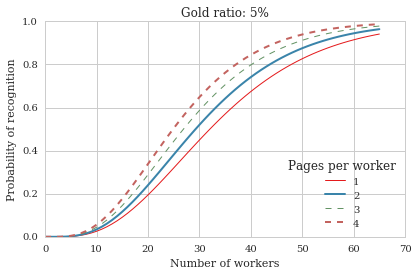

In [14]:
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
#sns.set(font='serif')
#sns.set_style("whitegrid") 


plt.rc('axes', prop_cycle=(cycler('color', cm.Set1(linspace(0,1,8))) + cycler('linestyle', ['-', '--', ':', '-.']) * cycler('lw', [1,2]) ))
plot(result[0:4].T,alpha=1)
plt.legend(pages[0:4],title='Pages per worker',loc=4)
plt.xlabel('Number of workers')
plt.ylabel('Probability of recognition')
plt.title('Gold ratio: 5%')
set_size(plt.gcf(),6,4)
plt.savefig('prob.pdf')

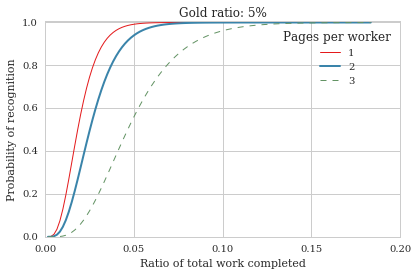

In [17]:
#reparametrize for work done
pages = [1,2,3]
result = np.zeros(shape=(3,110))
for p in pages:
    result[p-1,:] = [prob_recognition(golds=golds,pages=p,workers=i*(3-p+1),times_seen=times_seen) for i in range(1,110+1)]
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
#sns.set_style("whitegrid") 

plt.rc('axes', prop_cycle=(cycler('color', cm.Set1(linspace(0,1,8))) + cycler('linestyle', ['-', '--', ':', '-.']) * cycler('lw', [1,2]) ))
plot(np.array(range(1,110+1))/600,result.T,alpha=1)
plt.ylim([0,1.005])
plt.legend(pages,title='Pages per worker')
plt.xlabel('Ratio of total work completed')
plt.ylabel('Probability of recognition')
plt.title('Gold ratio: 5%')
set_size(plt.gcf(),6,4)
plt.savefig('prob_workdone.pdf')

# parameters
1. Number of total rows (total)
2. Number of gold questions (golds)
3. Number of times same non gold is asked (agree) and thus agree + 1 is the number needed to recognize a gold (times_seen)
4. max number of pages per worker. A page has 10 questions (max_pages)
5. **questions_per_page** = 10 (equivalent on **gold frequency** that is related to **quality**)
6. **gold_ratio** this is related to **price**
7. **time** is related to worse case workers (depends on questions_per_page and pages_per_work)

In [18]:
total = 2000
agree = 3
gold_ratio = 0.15
questions_per_pag = 10

times_seen = agree + 1
golds = gold_ratio * total
max_pages = int((golds - questions_per_pag)/questions_per_pag)
max_workers = int(total *agree /(max_pages*questions_per_pag))
worse_case_worker_needed = int(total *agree /(1*questions_per_pag))
max_workers_if3 = int(total *agree /(3*questions_per_pag))
print("max workers",max_workers,"max pages",max_pages,"worse case needs: ", worse_case_worker_needed,"workers.","With 3:",max_workers_if3)
pages = list(range(1,max_pages+1))


max workers 20 max pages 29 worse case needs:  600 workers. With 3: 200


150
100
50


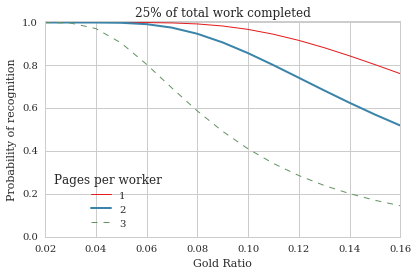

In [19]:
# cycling through gold ratio (price) from 0.02 to 0.15
# so we can plot up to 3 pages and up to 200 workers
# and we plot the values after 25% work is done (half work done in 100 for the case of 3 pages and 1/6th work dones for one page with 100)
gold_ratios = list(np.arange(0.02,0.16,0.01))
pages = [1,2,3]
result = np.zeros(shape=(3,len(gold_ratios)))
for p in pages:
    print(50*(3-p+1))
    result[p-1,:] = [prob_recognition(golds=i*total,pages=p,workers=50*(3-p+1),times_seen=times_seen) for i in gold_ratios]
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
#sns.set_style("whitegrid") 

plt.rc('axes', prop_cycle=(cycler('color', cm.Set1(linspace(0,1,8))) + cycler('linestyle', ['-', '--', ':', '-.']) * cycler('lw', [1,2]) ))
plot(gold_ratios,result[0:3].T,alpha=1)
plt.legend(pages[0:3],title='Pages per worker',loc=3)
plt.ylim([0,1.005])
plt.xlabel('Gold Ratio')
plt.ylabel('Probability of recognition')
plt.title('25% of total work completed')
set_size(plt.gcf(),6,4)
plt.savefig('prob_gold.pdf')

In [113]:
result

array([[ 1.        ,  1.        ,  0.99999941,  0.99996846,  0.99962003,
         0.99796014,  0.99324734,  0.98360864,  0.96774095,  0.94523019,
         0.91648155,  0.8824573 ,  0.8443923 ,  0.80357058,  0.76118222],
       [ 1.        ,  0.99999942,  0.99990715,  0.99854953,  0.99216351,
         0.97599466,  0.94741664,  0.90688832,  0.85697691,  0.80101284,
         0.74216134,  0.68298942,  0.62536519,  0.57052443,  0.51919743],
       [ 0.99999271,  0.99739334,  0.97179958,  0.90423435,  0.80479058,
         0.69409915,  0.58733211,  0.49199527,  0.41040941,  0.34220041,
         0.28586515,  0.23959204,  0.20163778,  0.17047236,  0.144813  ]])

In [114]:
0.25*200

50.0

In [115]:
total = 2000
agree = 3
gold_ratio = 0.02
questions_per_pag = 3

times_seen = agree + 1
golds = gold_ratio * total
max_pages = int((golds - questions_per_pag)/questions_per_pag)
max_workers = int(total *agree /(max_pages*questions_per_pag))
worse_case_worker_needed = int(total *agree /(1*questions_per_pag))
max_workers_if3 = int(total *agree /(3*questions_per_pag))
print("max workers",max_workers,"max pages",max_pages,"worse case needs: ", worse_case_worker_needed,"workers.","With 3:",max_workers_if3)
pages = list(range(1,max_pages+1))


max workers 166 max pages 12 worse case needs:  2000 workers. With 3: 666
